In [23]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

### Data

In [2]:
od.download(
    "https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Skipping, found downloaded files in ".\titanic-dataset" (use force=True to force download)


In [3]:
df = pd.read_csv('titanic-dataset/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass ={1st class, 2nd class, 3rd class}                
SibSp = nber of siblings/spouses aboard the titanic                
Parch = nber of parents/children aboard the titanic                         
Embarked = Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Drop useless columns
df.drop(columns=['Name', 'Ticket'], inplace=True)

#### Null Values

In [6]:
null_col = df.isnull().sum()
null_col[null_col>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Null value percentages = count of null values / total nber * 100
null_percentages = {}
for col in null_col[null_col>0].keys():
    null_percentages[col] = (null_col[col] / df[col].shape[0]) * 100

null_percentages

{'Age': 19.865319865319865,
 'Cabin': 77.10437710437711,
 'Embarked': 0.22446689113355783}

Cabin: lot of null values, will drop that column
Age: Use median method to fill null values
Embarked: Use mode (aka most used value)

In [8]:
# Drop Cabin Column
df.drop(columns='Cabin', inplace=True)

# Fill Age column using median, Embarked column using mode
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)


#### Data description & Visualization

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include='object')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


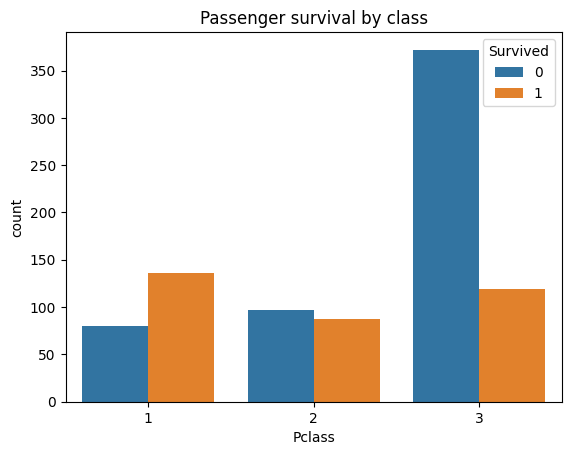

In [11]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Passenger survival by class")
plt.show()

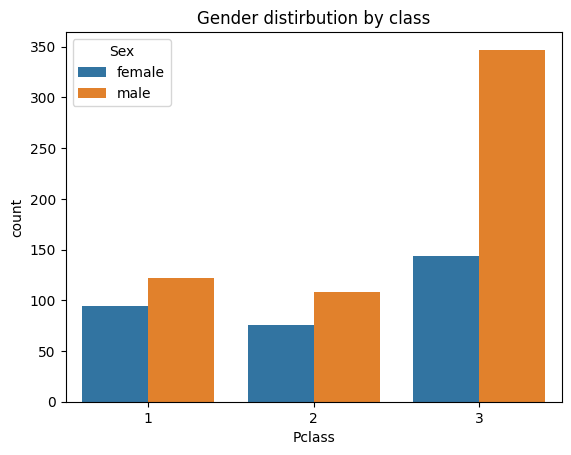

In [12]:
sns.countplot(data=df, x='Pclass', hue='Sex')
plt.title("Gender distirbution by class")
plt.show()

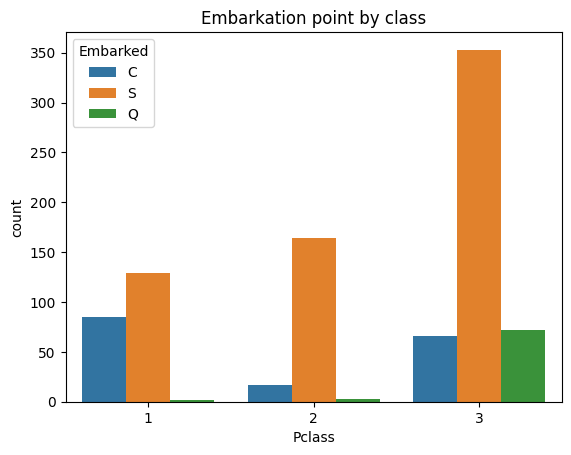

In [13]:
sns.countplot(data=df, x='Pclass', hue='Embarked')
plt.title("Embarkation point by class")
plt.show()

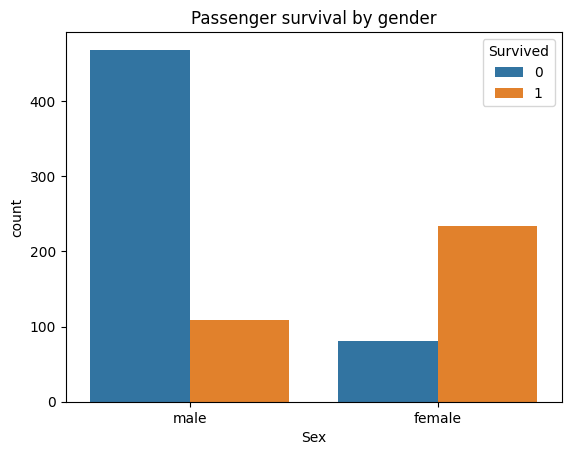

In [14]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Passenger survival by gender")
plt.show()

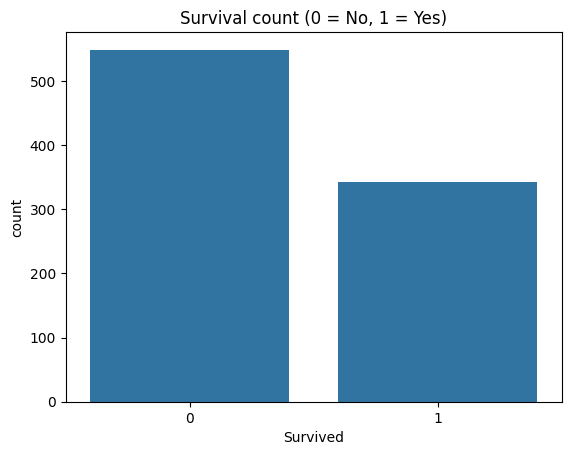

In [15]:
sns.countplot(data=df, x='Survived')
plt.title("Survival count (0 = No, 1 = Yes)")
plt.show()

<Axes: >

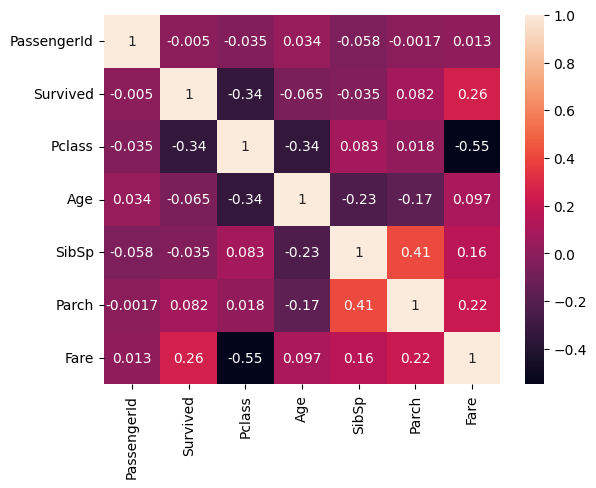

In [16]:
num_data = df.select_dtypes(include='number')
sns.heatmap(num_data.corr(), annot=True)

#### Encoding

**fit():**
- Learns the mapping from labels to integers.
- Stores the transformation rules but does not apply them to data. 

**fit_transform():**
- Combines .fit() and .transform().
- Learns the mapping and applies the transformation to the data in one step.

In [17]:
le = LabelEncoder()

# Encoding 'Sex' column
df['Sex'] = le.fit_transform(df['Sex'])
print("Sex Mapping:")
# dict(zip(...)) pairs them into a dictionary for easy viewing.
print(dict(zip(le.classes_, le.transform(le.classes_))))  # Shows the mapping

# Encoding 'Embarked' column
df['Embarked'] = le.fit_transform(df['Embarked'])
print("\nEmbarked Mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))  # Shows the mapping


Sex Mapping:
{'female': 0, 'male': 1}

Embarked Mapping:
{'C': 0, 'Q': 1, 'S': 2}


In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
X = df.drop(columns = ['Survived','PassengerId'])
y = df['Survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Helper function to build the model
models_names = []
scores = []
def run_model(model, X_train, X_test, y_train, y_test):
    print(model)
    # Fit the model training
    model.fit(X_train, y_train)

    # Get the metrics
    predictions = model.predict(X_test) 
    
    print(classification_report(y_test, predictions))
    models_names.append(type(model).__name__)
    scores.append(accuracy_score(y_test,predictions))

In [40]:
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors' : KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Classifier SVC' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(criterion='entropy',random_state=7),
    'Gaussian NV' : GaussianNB()
}

model_accuracies = {}

for k,model in models.items():
    run_model(model, X_train, X_test, y_train, y_test)

RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       105
           1       0.76      0.50      0.60        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179

LogisticRegression()
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.

In [41]:
data = pd.DataFrame({
                     'Model' : models_names,
                     'Score' : scores
})
data.sort_values(by='Score',ascending=False)

,Model,Score
0,RandomForestClassifier,0.821229
2,LogisticRegression,0.810056
5,GaussianNB,0.776536
4,DecisionTreeClassifier,0.770950
1,KNeighborsClassifier,0.726257
3,SVC,0.659218
